## Practical Number 4
#### Ньяти Каелиле БВТ2201

#### Normal distribution

### Exercise 1, 2, 3

In [1]:
import math, random

#function to generate random numbers according to linear law
def t_normal(k1, k2, k3, k4):
    k1 = random.uniform(0, k1) 
    k2 = random.uniform(0,k2)
    k3 = random.uniform(0,k3)
    k4 = random.uniform(0,k4)

    '''
    k1 = (k1-0)*random.random() + 0
    k2 = (k2-0)*random.random() + 0
    k3 = (k3-0)*random.random() + 0
    k4 = (k4-0)*random.random() + 0
    '''

    return k1+k2+k3+k4

# Function to calculate mean for normal distribution
def mean_theory(k1, k2, k3, k4):
    math_exp = 0.5*(k1 + k2+ k3+ k4)
    return math_exp       

#Function to calculate variance for normal distribution
def variance_theory(k1, k2, k3, k4):
    variance_value = (1/12)*((k1**2) + (k2**2) + (k3**2) + (k4**2))
    return variance_value  
    
#Function to calculate standard deviation
def standard_deviation(variance_value):
    if variance_value is None or variance_value == 0:
        return None
    return math.sqrt(variance_value)

#probability distribution function (pdf) for normal distribution
def normal_dis_function(std, expectation, x):
    part_1 = 1/(std*(math.sqrt(2*(math.pi)))) #std is the standard deviation
    part_2 = math.exp((-1/2)*(((x- expectation)/std)**2)) #math_exp is the mathematical expectation
    result = part_1 * part_2
    return result


In [2]:
# Function to calculate mean of a sample
def mean_sample(data):
    return sum(data) / len(data)


# Function to calculate mean of squares of sample
def mean_of_squares_sample(data):
    return sum(x**2 for x in data) / len(data)


# Function to calculate unbiased sample variance
def unbiased_sample_variance(data, mean_sample, mean_of_squares_sample):
    N = len(data)
    if N < 2:
        return None
    return (N / (N - 1)) * (mean_of_squares_sample - mean_sample**2)



def relative_error(mean_sample, mean_theory):
    #(max_x+min_x)/2 - theoretical mathematical expectation
    return ((abs(mean_sample - mean_theory)) / mean_theory) * 100  


def relative_err_var(variance, variance_theory):
    if variance is None or variance == 0:
        return None
    #((max_x-min_x)**2)/12 -  theoretical variance
    return ((abs(variance - variance_theory)) / variance_theory) * 100 

def relative_err_std(std_dev_sample, std_dev_theory):
    if std_dev_sample is None or std_dev_sample == 0:
        return None
    return ((abs(std_dev_sample  - std_dev_theory)) / std_dev_theory) * 100  

In [3]:
def simulations(k1, k2, k3, k4, random_numbers):
    
    # Calculate the theoretical expectation
    mean_theory_value = mean_theory(k1, k2, k3, k4)

    # Calculate the sample expectation
    mean_sample_value = mean_sample(random_numbers)

    #Calculate mean of squares
    mean_of_squares_sample_value = mean_of_squares_sample(random_numbers)


    #Calculate the theoretical variance
    variance_theory_value = variance_theory(k1, k2, k3, k4)

    #Calculate the sample variance
    variance_sample_value = unbiased_sample_variance(random_numbers, mean_sample_value, mean_of_squares_sample_value)

    
    # Calculate the theoretical standard deviation
    std_dev_theory = standard_deviation(variance_theory_value)

    #Calculate the sample standard deviation
    std_dev_sample = standard_deviation(variance_sample_value)


    #Relative error for expectation
    relative_err = relative_error(mean_sample_value, mean_theory_value)

    #Relative error for variance
    relative_err_variance = relative_err_var(variance_sample_value, variance_theory_value)

    #Relative error for standard deviation
    relative_err_standard = relative_err_std(std_dev_sample, std_dev_theory)

    
    return mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory, std_dev_sample, relative_err, relative_err_variance, relative_err_standard


In [4]:

def aggregate():

    print("________________________________________________________________________________________________________________________________________________________________________________\n")

    # Display aggregate results
    print(f"After a simulation with {n} random numbers each:")

    print(f"Random numbers: {random_numbers}")
    #print(f"Random numbers: {[f'{num:.2f}' for num in random_numbers]}")

    print(f"Max_Random is {max(random_numbers)}")
    print(f"Min_Random is {min(random_numbers)}\n")

    print(f"Mathematical Expectation (Theoretical): {mean_theory_value}")
    print(f"Mathematical Expectation (Sample): {mean_sample_value}\n")

    print(f"Theoretical Variance: {variance_theory_value}")
    print(f"Unbiased Sample Variance: {variance_sample_value}\n")

    print(f"Theoretical Standard Deviation: {std_dev_theory_value}")
    print(f"Sample Standard Deviation: {std_dev_sample}\n")

    print(f"Relative Error for Mathematical Expectation: {relative_err}%")
    print(f"Relative Error for Standard Deviation: {relative_err_standard}%")
    print(f"Relative Error for Variance: {relative_err_variance}%\n")


In [22]:
import matplotlib.pyplot as plt

def relative_frequencies(random_sample, left_boundary, right_boundary, num_plots):
    # Determine the width of each interval (bin)
    interval_width = (right_boundary - left_boundary) / num_plots
    
    # Initialize a list to hold the frequency count for each interval
    frequency_counts = [0] * num_plots
    
    # Loop through the random sample and count which interval each number falls into
    for num in random_sample:
        # Check if the number is within the specified boundaries
        if left_boundary <= num <= right_boundary:
            # Determine which interval the number falls into
            index = int((num - left_boundary) // interval_width)
            
            # Edge case for the rightmost boundary
            if index == num_plots:
                index -= 1
            
            # Increment the count for that interval
            frequency_counts[index] += 1
    
    # Convert the frequency counts to relative frequencies
    total_numbers = len(random_sample)
    relative_frequencies = [count / total_numbers for count in frequency_counts]
    
    return relative_frequencies


def draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, relative_frequencies, std_dev_theory, mean_theory):
    # Calculate the bin edges
    bins = [left_boundary + (i * (right_boundary - left_boundary) / num_plots) for i in range(num_plots + 1)]
    
    # Calculate the width of each bar
    bar_width = (right_boundary - left_boundary) / num_plots
    
    # Adjust the x positions to match the bins
    x_positions = [bins[i] for i in range(num_plots)]

    # Create the histogram plot
    plt.figure(figsize=(12, 6))


    # Plot the bars with uniform width across the boundary range
    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], label="Histogram")
    

    # Create x-values for plotting the PDF based on standard deviation and expectation
    '''
    To plot the points, they usually lie within 3 standard deviations from the mean. So we take our minimum at 3 standard 
    deviations from mean_theory, and our maximum from 3 standard deviations after the mean

    100 points are chosen arbitrarily to provide enough resolution for the curve to look smooth.
    '''
    #x_values = [mean_theory - 3 * std_dev_theory + i * (6 * std_dev_theory) / 100 for i in range(100)]
    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    y_values = [normal_dis_function(std_dev_theory, mean_theory, x) for x in x_values]
  
    plt.plot(x_values, y_values, color='red', label="Normal PDF")

    # Labeling the axes
    plt.title("Histogram and PDF")
    plt.xlabel("Random Number")
    plt.ylabel("Relative Frequency / Probability Density")
    plt.legend()
    
    # Show the plot
    plt.show()
    

In [6]:
#For plotting relative error against number of experiments

def draw_graph_err(n_values, errors):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, errors, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel('Number of Experiments (n)')
    plt.ylabel('Relative Error (%)')
    plt.title('Relative Error vs. Number of Experiments')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()


________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random numbers: [5.997400497001763, 4.398798377913448, 1.6923591168848784, 0.8808383270711465, 3.277875581551229, 5.667460691449142, 2.423693041536605, 5.462020351988386, 9.627641209314785, 8.477538104884154]
Max_Random is 9.627641209314785
Min_Random is 0.8808383270711465

Mathematical Expectation (Theoretical): 6.5
Mathematical Expectation (Sample): 4.790562529959553

Theoretical Variance: 5.25
Unbiased Sample Variance: 8.066218085869494

Theoretical Standard Deviation: 2.29128784747792
Sample Standard Deviation: 2.8401088158501064

Relative Error for Mathematical Expectation: 26.29903800062226%
Relative Error for Standard Deviation: 23.95251076709057%
Relative Error for Variance: 53.642249254657024%



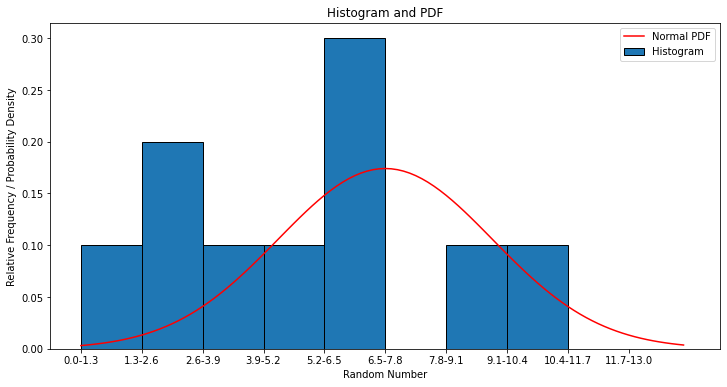

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random numbers: [8.55083539099311, 7.190810716584301, 9.764143523038127, 10.061495661963606, 10.047715451115579, 5.950320977945372, 7.76837818930831, 9.476805131216093, 8.965882226687917, 7.221936846922826, 5.288809334010713, 6.447473078792031, 7.31874922376309, 9.04941979449743, 9.767578692878024, 6.5228939539932025, 11.06976436400714, 7.442583937569426, 4.82028377720751, 6.362212729001969]
Max_Random is 11.06976436400714
Min_Random is 4.82028377720751

Mathematical Expectation (Theoretical): 6.5
Mathematical Expectation (Sample): 7.954404650074788

Theoretical Variance: 5.25
Unbiased Sample Variance: 3.137126032990762

Theoretical Standard Deviation: 2.29128784747792
Sample Standard Deviation: 1.7711933923179484

Relative Error for Mathematical Expectation: 22.3

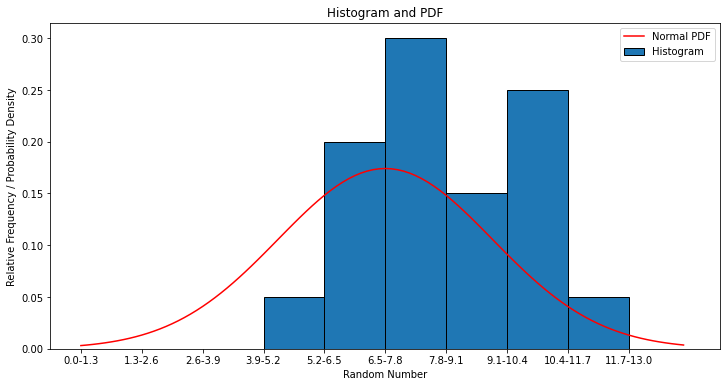

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random numbers: [4.7848625957221875, 8.8506742653188, 4.765076915449271, 10.376304727908462, 8.832406891630463, 7.261131569022836, 10.221428183527536, 4.107588011456067, 3.546378443946959, 8.46794389997895, 9.030505557928624, 3.2555457280342597, 10.057947526203904, 8.241885478053938, 8.505675645318213, 9.42956961555996, 5.335454009260129, 3.2004571419821017, 5.183869294649295, 3.1640114085368785, 8.56696245489878, 5.892315189099482, 8.466189138282473, 7.789953064057931, 11.342777900386999, 6.953448906045688, 5.048401205190385, 4.650260096138913, 1.7836924635479001, 4.513458069929737, 6.58678563487433, 3.216426480529502, 4.63747738951694, 5.561275306453322, 10.010033647525518, 3.0280479246321566, 8.324471982427369, 8.504693285163727, 6.389544278211359, 5.5766767727

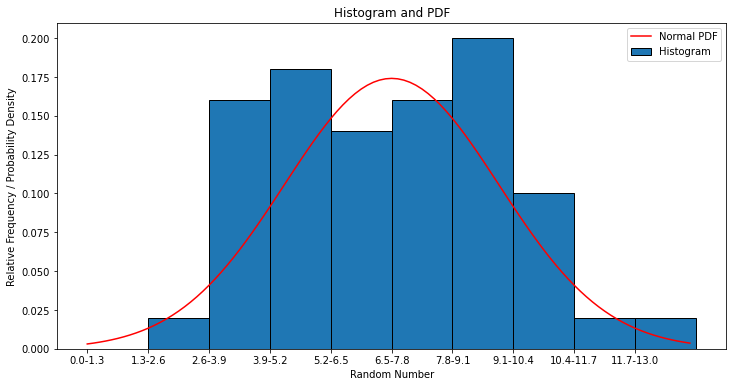

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random numbers: [9.567418942936897, 6.980529223911308, 7.7428951107679955, 8.783485543878166, 10.713409830952287, 8.406358474349796, 5.4874120611401915, 7.594798028978353, 5.299403953610743, 9.050820665254392, 8.99365459042351, 6.667114218495066, 8.01289800197912, 10.079264392889819, 3.579782651471714, 2.1387685899027584, 6.395629167137026, 10.871579647719983, 4.253411162873656, 9.26849704017122, 8.263427632240827, 9.438953636265559, 9.7822575863174, 8.200896393514205, 3.8488663933785072, 6.947215219324768, 7.7157960951121005, 2.978950127074422, 4.492295018609642, 4.6874056403587785, 7.21844925576993, 8.132897556341836, 9.825352730387575, 4.764061373823719, 4.524800444243436, 8.892901109955217, 8.080738937709699, 4.643320631401005, 2.989633323876931, 9.3421807102

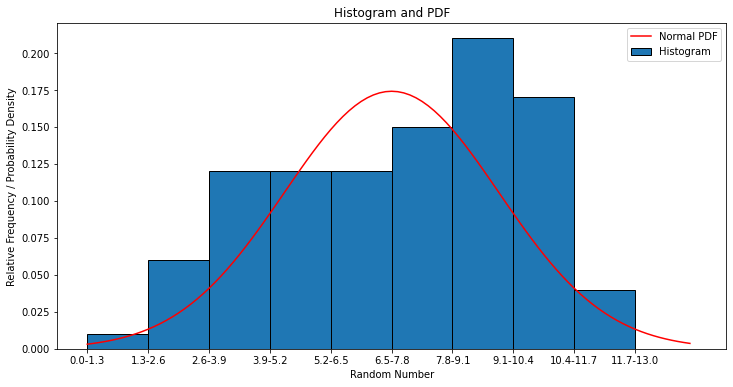

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random numbers: [4.574868727049892, 7.407399216851443, 7.443499791394107, 8.476190075073596, 10.427214937916698, 8.490092980582924, 8.005681810696991, 10.144440148945263, 10.668216458239236, 5.393013830640804, 5.666270742529344, 2.0244930396836947, 5.978692631523344, 5.450335306712615, 4.394348937137101, 3.4082815445297028, 3.8975571218950504, 2.536098198331138, 4.861756351615798, 8.083947532905134, 4.795110180661856, 7.092811953921644, 11.439618803724414, 6.931602492804651, 3.8603943648669405, 4.8174132727420105, 6.833524447452185, 2.785159209700033, 7.176363781151256, 7.115295916860628, 6.289726835274308, 8.631502258807718, 3.3194624212030046, 5.503891505019522, 7.21387965026345, 4.497479563013392, 9.741522057051045, 9.552029029956262, 8.30824900961261, 4.69225

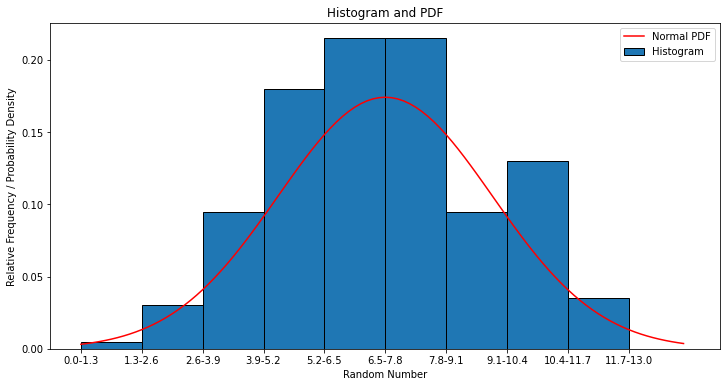

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random numbers: [8.037855486975353, 2.6555190253885725, 6.880981675670681, 8.504142992410733, 3.6684468927353957, 4.642179538779148, 10.900341321623541, 5.508981743583776, 6.5291227360711845, 8.231844843945588, 5.8530531790854985, 1.18650093705733, 11.388503937022893, 6.5397278368604725, 7.705911489187299, 7.940307564019479, 3.5281449579972053, 7.5627985896319005, 2.944792576622428, 9.415742814729574, 8.944285620402667, 3.8223553722373507, 7.426336242077717, 3.3857781658367525, 1.8043026411137872, 6.40392757920473, 2.7787801357378514, 3.387048790314893, 8.363462439786748, 6.792730846732143, 4.136282409860095, 4.057340902809022, 8.777079686076409, 3.0346926697132846, 3.262230766276147, 4.730037908277044, 8.042534524011522, 7.347593531967458, 6.2878363623911895, 3.

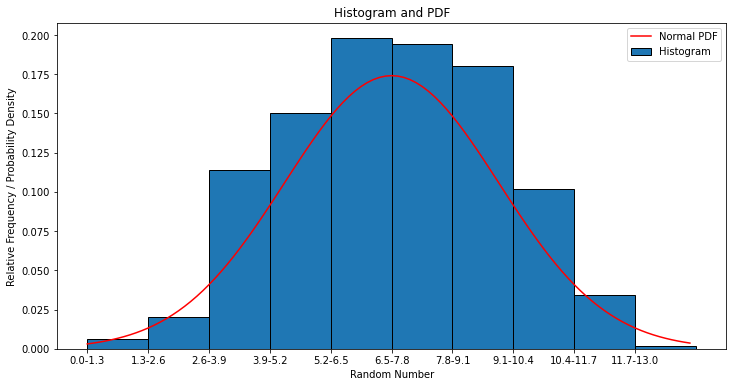

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random numbers: [7.8757782684575, 7.526092292756378, 8.839137403045875, 7.575101253896441, 9.122330235043892, 8.23799398565922, 3.4162547759728903, 7.321170672103576, 8.773549598670018, 4.761815333628199, 4.660702108948915, 3.0148949496127058, 5.581247888647564, 3.9066108949752456, 11.263853410567734, 6.54787715836887, 5.1203096058368684, 8.5216419958488, 2.5004299342250613, 5.256679527814984, 4.073908605076182, 8.197333142313822, 2.8684376932378353, 4.022830669338077, 10.773920487407661, 5.5951189394698195, 5.822771156512768, 5.008002853073048, 6.1638525291335995, 8.319414537402535, 9.277134118695752, 3.7809208879170333, 7.0668614002314865, 6.328781037450858, 6.178799293466122, 4.949500820609744, 5.2874623916869075, 5.5125706935810515, 7.50884740732807, 3.24176

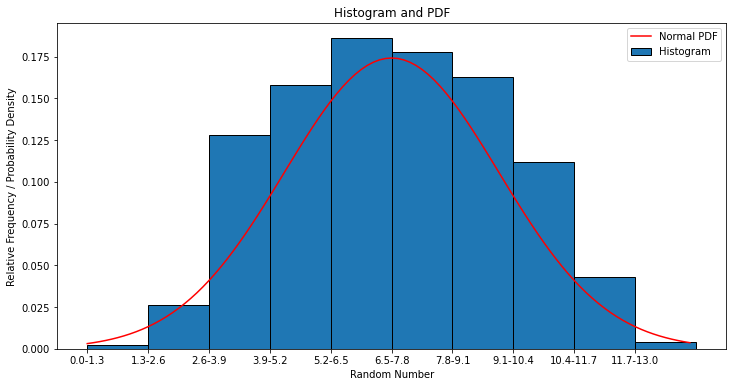

In [23]:
k1 = 2
k2 = 1
k3 = 7
k4 = 3

n_values= [10, 20, 50, 100, 200, 500, 10**3]

relative_err_mean_list = []
relative_err_std_list = []
relative_err_var_list = []


for n in n_values:
    random_numbers = []

    for _ in range(n):
        # Generate random numbers 
        random_number = t_normal(k1, k2, k3, k4)
        random_numbers.append(random_number)

        mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory_value, std_dev_sample, relative_err, relative_err_variance, relative_err_standard = simulations(k1, k2, k3, k4, random_numbers)

    aggregate()

    left_boundary = 0  # Minimum boundary of the range
    right_boundary = 13  # Maximum boundary of the range
    num_plots = 10  # Number of intervals (bins)

    frequencies = relative_frequencies(random_numbers, left_boundary, right_boundary, num_plots)

    draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, std_dev_theory_value, mean_theory_value)
    #draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, 1, 3)

    relative_err_mean_list.append(relative_err)
    relative_err_std_list.append(relative_err_standard)
    relative_err_var_list.append(relative_err_variance)
    

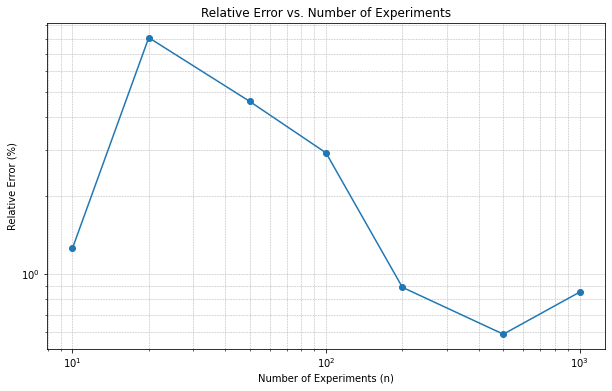

In [113]:
#RELATIVE ERROR FOR EXPECTATION
draw_graph_err(n_values, relative_err_mean_list) #drawing graph of relative error against n experiments.

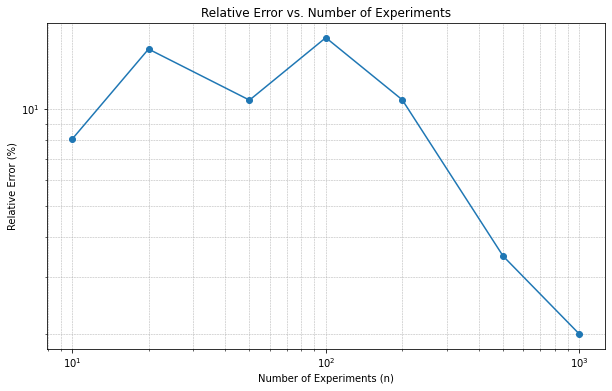

In [114]:
#RELATIVE ERROR FOR VARIANCE
draw_graph_err(n_values, relative_err_var_list)

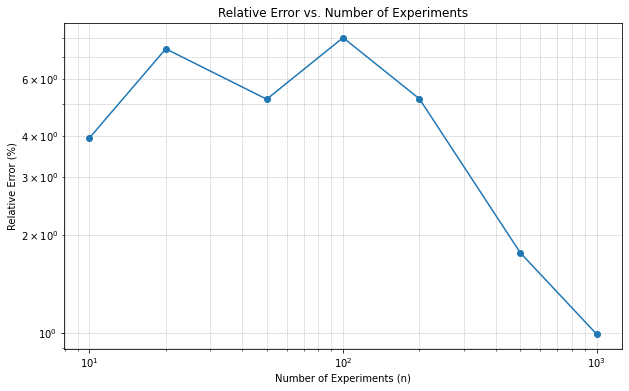

In [115]:
#RELATIVE ERROR FOR STANDARD DEVIATION
draw_graph_err(n_values, relative_err_std_list)

In [129]:
def trapezoidal_rule(x_values, y_values):
    area = 0
    for i in range(1, len(x_values)):
        # Trapezoidal approximation for each interval
        area += (x_values[i] - x_values[i - 1]) * (y_values[i] + y_values[i - 1]) / 2
    return area


x_values = [mean_theory_value - 3 * std_dev_theory_value + i * (6 * std_dev_theory_value) / 100 for i in range(100)]
y_values = [normal_dis_function(std_dev_theory_value, mean_theory_value, x) for x in x_values]

# Calculate the area under the curve
area = trapezoidal_rule(x_values, y_values)

# Display the area
print(f"Estimated area under the PDF curve: {area:.5f}")

Estimated area under the PDF curve: 0.99700
